In [5]:
# Basic Models - Fare and Duration Prediction
# *By: Miguel*

# 1. Initial Setup

import sys
sys.path.append('./')  # Para importar módulos de src/

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


In [7]:
# 2. Data Loading
file_path = '../data/yellow_tripdata_2022-02.parquet'
df = pd.read_parquet(file_path)

In [8]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-02-01 00:06:58,2022-02-01 00:19:24,1.0,5.40,1.0,N,138,252,1,17.0,1.75,0.5,3.90,0.00,0.3,23.45,0.0,1.25
1,1,2022-02-01 00:38:22,2022-02-01 00:55:55,1.0,6.40,1.0,N,138,41,2,21.0,1.75,0.5,0.00,6.55,0.3,30.10,0.0,1.25
2,1,2022-02-01 00:03:20,2022-02-01 00:26:59,1.0,12.50,1.0,N,138,200,2,35.5,1.75,0.5,0.00,6.55,0.3,44.60,0.0,1.25
3,2,2022-02-01 00:08:00,2022-02-01 00:28:05,1.0,9.88,1.0,N,239,200,2,28.0,0.50,0.5,0.00,3.00,0.3,34.80,2.5,0.00
4,2,2022-02-01 00:06:48,2022-02-01 00:33:07,1.0,12.16,1.0,N,138,125,1,35.5,0.50,0.5,8.11,0.00,0.3,48.66,2.5,1.25


In [9]:
# Dimensions
print("Shape:", df.shape)

Shape: (2979431, 19)


In [10]:
# 3. Basic Preprocessing (Fare Prediction)
# Selection of Relevant Features
features_fare = [
    'trip_distance', 
    'PULocationID', 
    'DOLocationID',
    'RatecodeID',
    'passenger_count',
    'tolls_amount',
    'fare_amount'  # Target
]

In [11]:
df_fare = df[features_fare].copy()

In [12]:
df_fare = df_fare[df_fare['fare_amount'] > 0]  # Positive Fares
df_fare = df_fare.dropna()

In [13]:
# New Dimensions
print("Shape:", df_fare.shape)

Shape: (2861063, 7)


In [14]:
#df_fare[['trip_distance', 'PULocationID', 'DOLocationID', 'RatecodeID', 'passenger_count', 'tolls_amount' ]]
X = df_fare.drop(columns=['fare_amount'])
# Target 'fare_amount'
y = df_fare['fare_amount']

In [15]:
# 4. Linear Regression Model (Fare)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [16]:
# Evaluation
train_score = lr_model.score(X_train, y_train)
test_score = lr_model.score(X_test, y_test)
print(f"R² Train: {train_score:.3f}, R² Test: {test_score:.3f}")

R² Train: 0.797, R² Test: 0.811


In [17]:
# 5. Preprocessing (Duration Prediction)
# Calculate Duration in Minutes
df['trip_duration'] = (
    pd.to_datetime(df['tpep_dropoff_datetime']) - 
    pd.to_datetime(df['tpep_pickup_datetime'])
).dt.total_seconds() / 60

In [18]:
# Filter Out Absurd Data
df_duration = df[
    (df['trip_duration'] > 0) & 
    (df['trip_duration'] < 180)  # Viajes < 3 horas
].copy()

features_duration = [
    'trip_distance',
    'PULocationID',
    'DOLocationID',
    'trip_duration'  # Target
]

In [19]:
df_time = df_duration[features_duration].copy()

In [20]:
Xt = df_time.drop(columns=['trip_duration'])
# Target 'fare_amount'
yt = df_time['trip_duration']

In [21]:
Xt_train, Xt_test, yt_train, yt_test = train_test_split(Xt, yt, test_size=0.2, random_state=42)

lr_modelt = LinearRegression()
lr_modelt.fit(Xt_train, yt_train)

LinearRegression()

In [22]:
# Evaluation Trip Duration Prediction
train_scoret = lr_modelt.score(Xt_train, yt_train)
test_scoret = lr_modelt.score(Xt_test, yt_test)
print(f"R² Train: {train_scoret:.3f}, R² Test: {test_scoret:.3f}")

R² Train: 0.014, R² Test: 0.013


In [23]:
# Mean Absolute Error (MAE)
y_pred = lr_model.predict(X_test)
mae_fare = mean_absolute_error(y_test, y_pred)
print(f"MAE (Fare): ${mae_fare:.2f}")

yt_pred = lr_modelt.predict(Xt_test)
mae_time = mean_absolute_error(yt_test, yt_pred)
print(f"MAE (Trip Duration): {mae_time:.2f} seconds")


MAE (Fare): $2.05
MAE (Trip Duration): 7.65 seconds


In [24]:
# Root Mean Square Error (MSE/RMSE)
mse_fare = mean_squared_error(y_test, y_pred)
rmse_fare = mse_fare ** 0.5
print(f"RMSE (Fare): ${rmse_fare:.2f}")

mse_time = mean_squared_error(yt_test, yt_pred)
rmse_time = mse_time ** 0.5
print(f"RMSE (Fare): {rmse_time:.2f} seconds")

RMSE (Fare): $5.12
RMSE (Fare): 11.00 seconds


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

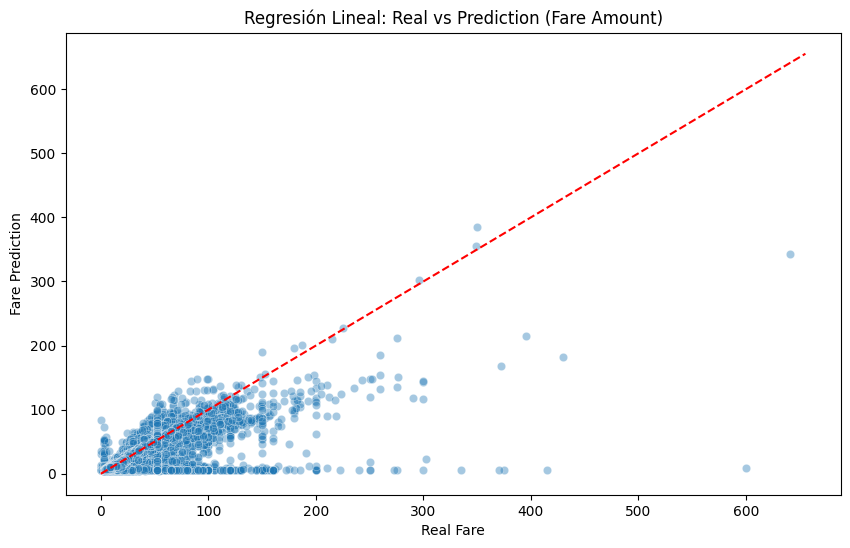

In [26]:
y_pred = lr_model.predict(X_test)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.4)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Línea de referencia (perfecta predicción)
plt.xlabel('Real Fare')
plt.ylabel('Fare Prediction')
plt.title('Regresión Lineal: Real vs Prediction (Fare Amount)')
plt.show()

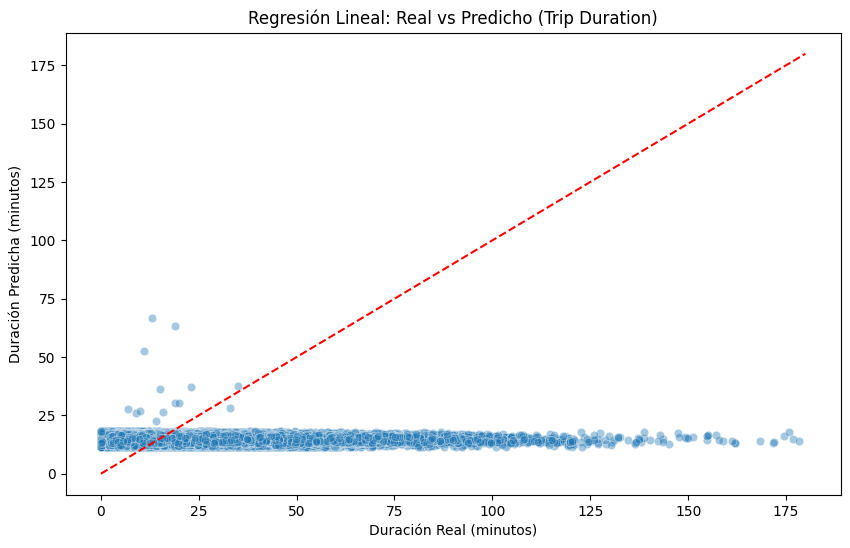

In [27]:
yt_pred = lr_modelt.predict(Xt_test)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=yt_test, y=yt_pred, alpha=0.4)
plt.plot([yt.min(), yt.max()], [yt.min(), yt.max()], 'r--')  # Línea de referencia (perfecta predicción)
plt.xlabel('Duración Real (minutos)')
plt.ylabel('Duración Predicha (minutos)')
plt.title('Regresión Lineal: Real vs Predicho (Trip Duration)')
plt.show()

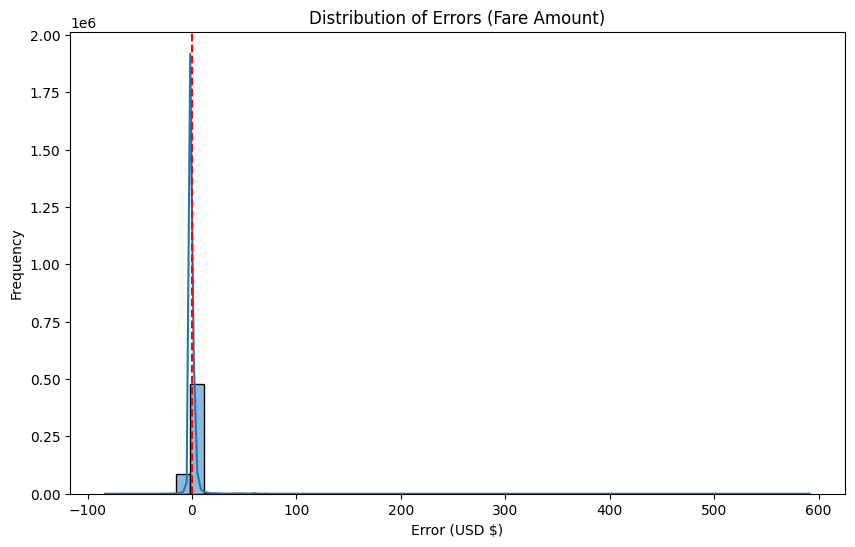

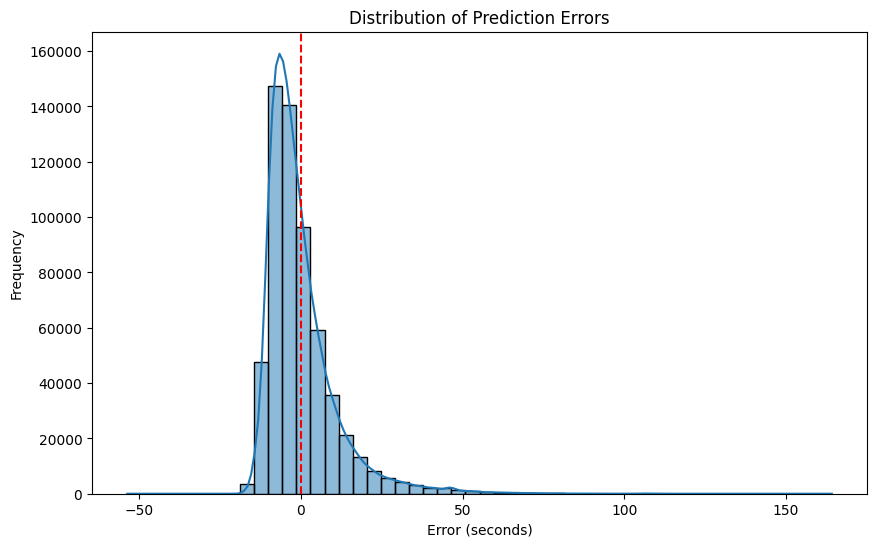

In [28]:
errors = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.histplot(errors, bins=50, kde=True)
plt.axvline(x=0, color='r', linestyle='--')
plt.xlabel('Error (USD $)')
plt.ylabel('Frequency')
plt.title('Distribution of Errors (Fare Amount)')
plt.show()


errorst = yt_test - yt_pred

plt.figure(figsize=(10, 6))
sns.histplot(errorst, bins=50, kde=True)
plt.axvline(x=0, color='r', linestyle='--')
plt.xlabel('Error (seconds)')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.show()

In [29]:
#Comparison metrics
baseline_metrics = {
    'Model': 'Linear Regression',
    'R² Fare test': test_score,
    'R Trip Duration': test_scoret,
    'MAE Fares': mae_fare,
    'MAE Trip Duration': mae_time,
    'RMSE Fares': rmse_fare,
    'RMSE Trip Duration': rmse_time,
}

In [30]:
# Basic RandomForest Model
rf_fare = RandomForestRegressor(
    n_estimators=100,  # Number of trees
    max_depth=10,   # Maximum depth
    random_state=42,
    n_jobs=-1         
)
rf_fare.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_jobs=-1, random_state=42)

In [31]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [32]:
# Predictions and evaluation
yf_pred_rf = rf_fare.predict(X_test)

mse = mean_squared_error(y_test, yf_pred_rf)
rmse = mse ** 0.5

print("\nRandomForest - Fare Amount Prediction (Basic Data):")
print(f"R²: {r2_score(y_test, yf_pred_rf):.3f}")
print(f"MAE: ${mean_absolute_error(y_test, yf_pred_rf):.2f}")
print(f"RMSE: ${rmse:.2f}")


RandomForest - Fare Amount Prediction (Basic Data):
R²: 0.919
MAE: $1.42
RMSE: $3.34


In [33]:
# Basic RandomForest Model
rf_time = RandomForestRegressor(
    n_estimators=100,  # Number of trees
    max_depth=10,   # Maximum depth
    random_state=42,
    n_jobs=-1         
)
rf_time.fit(Xt_train, yt_train)

RandomForestRegressor(max_depth=10, n_jobs=-1, random_state=42)

In [34]:
# Predictions and evaluation
yft_pred_rf = rf_time.predict(Xt_test)

mset = mean_squared_error(yt_test, yft_pred_rf)
rmset = mset ** 0.5

print("\nRandomForest - Trip Duration Prediction (Basic Data):")
print(f"R²: {r2_score(yt_test, yft_pred_rf):.3f}")
print(f"MAE: ${mean_absolute_error(yt_test, yft_pred_rf):.2f}")
print(f"RMSE: ${rmse:.2f}")


RandomForest - Trip Duration Prediction (Basic Data):
R²: 0.710
MAE: $3.63
RMSE: $3.34


C:\Users\Usuario\AppData\Local\Temp\ipykernel_21652\2416143932.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_fare, x='Importance', y='Feature', palette='viridis')


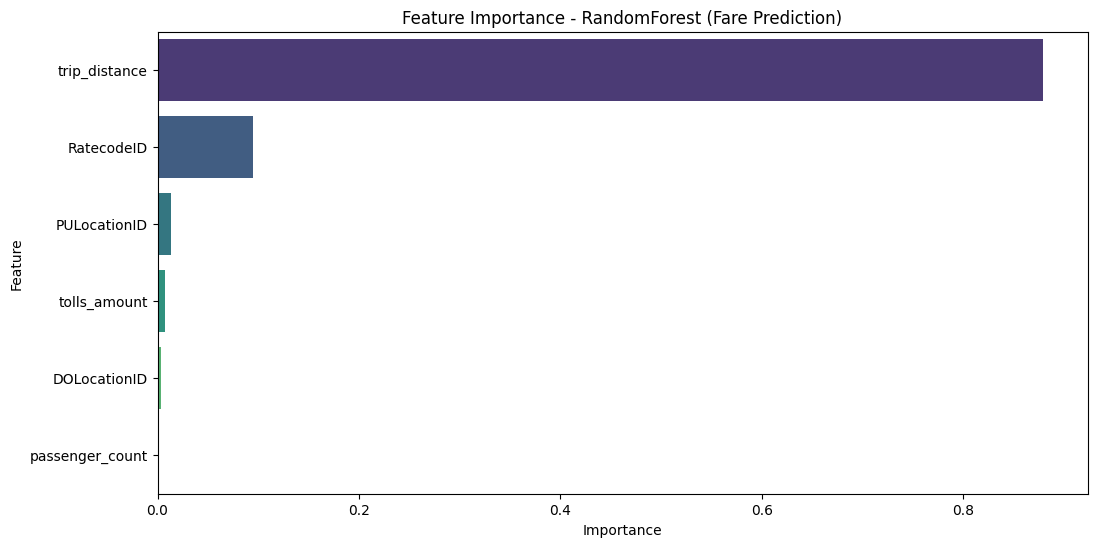

In [35]:
# Feature Importance for Fare Prediction
plt.figure(figsize=(12, 6))
importance_fare = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_fare.feature_importances_
}).sort_values('Importance', ascending=False)

sns.barplot(data=importance_fare, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance - RandomForest (Fare Prediction)')
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_21652\1905847429.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_time, x='Importance', y='Feature', palette='rocket')


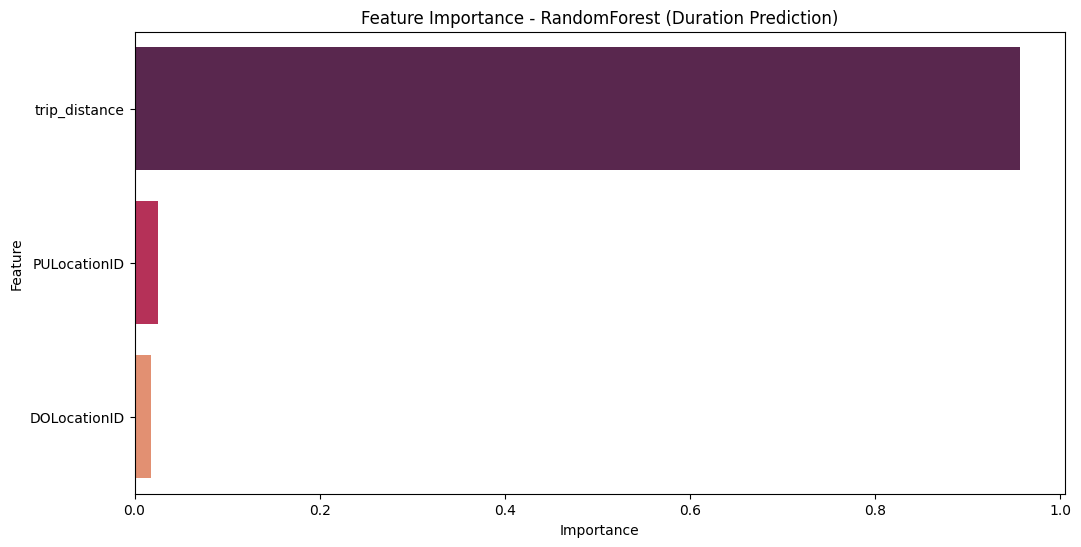

In [36]:
# Feature Importance for Duration Prediction
plt.figure(figsize=(12, 6))
importance_time = pd.DataFrame({
    'Feature': Xt_train.columns,
    'Importance': rf_time.feature_importances_
}).sort_values('Importance', ascending=False)

sns.barplot(data=importance_time, x='Importance', y='Feature', palette='rocket')
plt.title('Feature Importance - RandomForest (Duration Prediction)')
plt.show()

Text(0.5, 1.0, 'Fare Prediction Comparison')

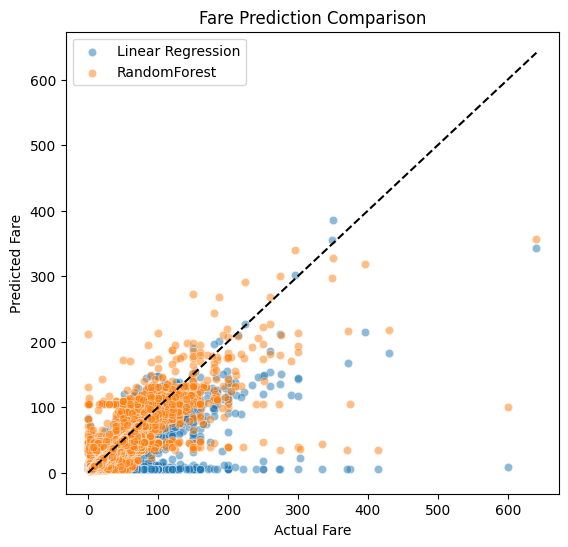

In [37]:
#Fare Prediction
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=lr_model.predict(X_test), alpha=0.5, label='Linear Regression')
sns.scatterplot(x=y_test, y=yf_pred_rf, alpha=0.5, label='RandomForest')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare')
plt.legend()
plt.title('Fare Prediction Comparison')

Text(0.5, 1.0, 'Duration Prediction Comparison')

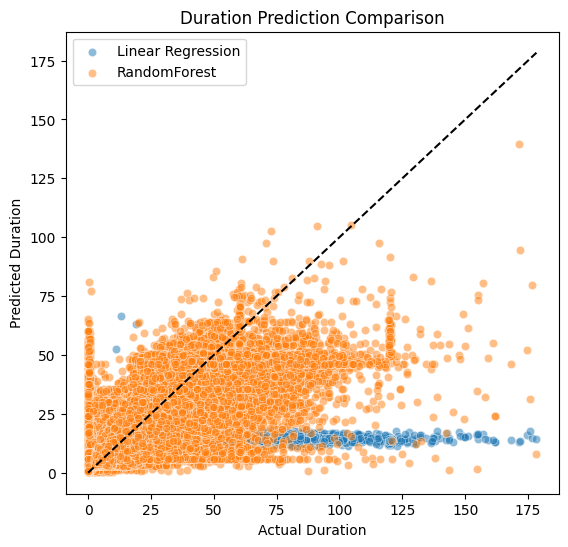

In [40]:
#Duration Prediction
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 2)
sns.scatterplot(x=yt_test, y=lr_modelt.predict(Xt_test), alpha=0.5, label='Linear Regression')
sns.scatterplot(x=yt_test, y=yft_pred_rf, alpha=0.5, label='RandomForest')
plt.plot([yt_test.min(), yt_test.max()], [yt_test.min(), yt_test.max()], 'k--')
plt.xlabel('Actual Duration')
plt.ylabel('Predicted Duration')
plt.legend()
plt.title('Duration Prediction Comparison')

Text(0.5, 1.0, 'Fare Prediction Residuals')

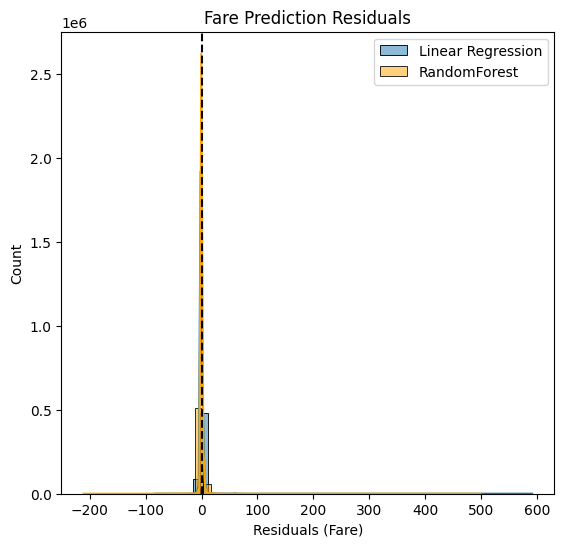

In [42]:
plt.figure(figsize=(14, 6))

# Residuales Fare
plt.subplot(1, 2, 1)
sns.histplot(y_test - lr_model.predict(X_test), bins=50, kde=True, label='Linear Regression', alpha=0.5)
sns.histplot(y_test - yf_pred_rf, bins=50, kde=True, label='RandomForest', alpha=0.5, color='orange')
plt.axvline(x=0, color='k', linestyle='--')
plt.xlabel('Residuals (Fare)')
plt.legend()
plt.title('Fare Prediction Residuals')

Text(0.5, 1.0, 'Duration Prediction Residuals')

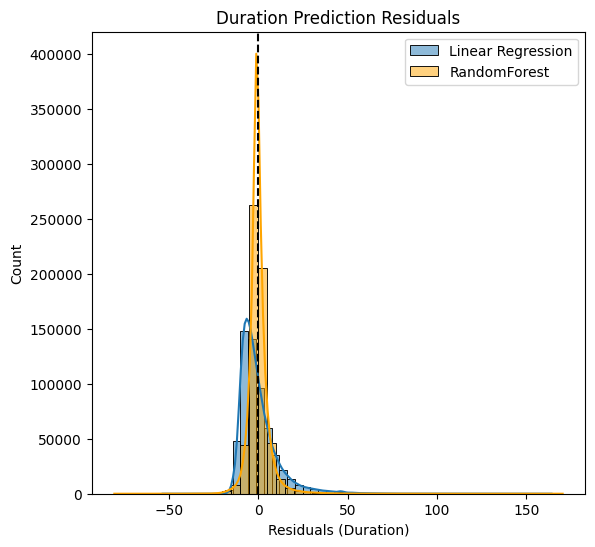

In [43]:
plt.figure(figsize=(14, 6))
# Residuales Duration
plt.subplot(1, 2, 2)
sns.histplot(yt_test - lr_modelt.predict(Xt_test), bins=50, kde=True, label='Linear Regression', alpha=0.5)
sns.histplot(yt_test - yft_pred_rf, bins=50, kde=True, label='RandomForest', alpha=0.5, color='orange')
plt.axvline(x=0, color='k', linestyle='--')
plt.xlabel('Residuals (Duration)')
plt.legend()
plt.title('Duration Prediction Residuals')